In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import utils

In [2]:
import itertools as it
def box3d(n=16):
    points = []
    N = tuple(np.linspace(-1, 1, n))
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    return np.hstack(points)/2

Exercise 2.1 and 2.2

Resolution: 800 x 800

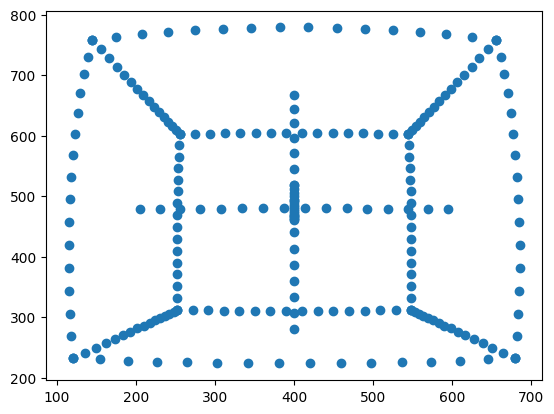

[[120.4 ]
 [232.24]]


In [3]:
f = 600
a = 1
b = 0
px = 400
py = 400
t = np.array([[0.0, 0.2, 1.5]])
K = np.array([[f, b*f, px],
             [0, a*f, py],
             [0, 0, 1]])
R = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
Q = box3d()

distCoeffs = [-0.2]

proj = utils.projectpoints(K, R, t, Q, distCoeffs)
plt.scatter(proj[0], proj[1], marker='o')
plt.show()

P1 = np.array([[-0.5, -0.5, -0.5]]).T
P1_proj = utils.projectpoints(K, R, t, P1, distCoeffs)
print(P1_proj)

Excercise 2.3

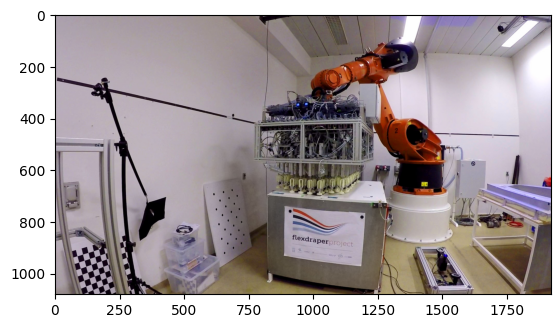

In [4]:
im = cv2.imread("gopro_robot.jpg")
im = im[:,:,::-1]
plt.imshow(im)

In [5]:
height, width, _ = im.shape
f = 0.455732 * width
a = 1
b = 0
px = width / 2
py = height / 2
t = np.array([[0.0, 0.2, 1.5]])
K = np.array([[f, b*f, px],
             [0, a*f, py],
             [0, 0, 1]])
R = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
Q = box3d()

distCoeffs = [-0.245031, 0.071524, -0.00994978]

print(K)

[[875.00544   0.      960.     ]
 [  0.      875.00544 540.     ]
 [  0.        0.        1.     ]]


2.4

In [6]:
def undistortImage(im, K, distCoeffs):
    x, y = np.meshgrid(np.arange(im.shape[1]), np.arange(im.shape[0]))
    p = np.stack((x, y, np.ones(x.shape))).reshape(3, -1)
    q = np.linalg.inv(K) @ p
    q_d = utils.distort(q, distCoeffs)
    p_d = K @ q_d
    x_d = p_d[0].reshape(x.shape).astype(np.float32)
    y_d = p_d[1].reshape(y.shape).astype(np.float32)
    assert (p_d[2]==1).all(), 'You did a mistake somewhere'
    return cv2.remap(im, x_d, y_d, cv2.INTER_LINEAR)

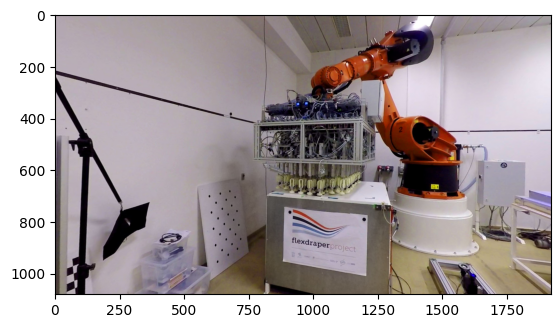

In [7]:
im_ud = undistortImage(im, K, distCoeffs)
plt.imshow(im_ud)

2.6

In [12]:
q2 = np.array([[1, 0, 2, 2], [1, 3, 3, 4]])

H = np.array([[-2, 0, 1],
              [1, -2, 0],
              [0, 0, 3]])

q1 = utils.Pi(H@utils.PiInv(q2))
print(q1)

H_ = utils.hest(q1, q2)
print(np.linalg.norm(H_))
H_ = H_ * H[0][0] / H_[0][0]
print(H_)

[[-0.33333333  0.33333333 -1.         -1.        ]
 [-0.33333333 -2.         -1.33333333 -2.        ]]
1.0
[[-2.00000000e+00 -1.06616929e-15  1.00000000e+00]
 [ 1.00000000e+00 -2.00000000e+00 -6.28548385e-16]
 [-6.79588404e-16  3.61060877e-16  3.00000000e+00]]


In [13]:
q1n, T = utils.normalize2d(q2)
print(np.mean(q1n,axis=1))
print(np.std(q1n,axis=1))

[ 1.11022302e-16 -5.55111512e-17]
[1. 1.]


In [14]:
H_ = utils.hest(q1, q2, normalize=True)
print(np.linalg.norm(H_))
H_ = H_ * H[0][0] / H_[0][0]
print(H_)

0.8000125690314782
[[-2.00000000e+00 -9.05887230e-16  1.00000000e+00]
 [ 1.00000000e+00 -2.00000000e+00  1.81472773e-15]
 [-3.64773998e-16  2.77551395e-16  3.00000000e+00]]


2.9

In [20]:
std = 10000
mean = 8000
q2 = np.random.randn(2, 100) * std + mean
H_true = np.random.randn(3,3)
q1 = utils.Pi(H_true@utils.PiInv(q2))
print(H_true)
print()

H_est = utils.hest(q1, q2)
H_est = H_est * H_true[0][0] / H_est[0][0]
print(H_est)
print('error without norm: ', np.linalg.norm(H_true - H_est))
print()

H_est_n = utils.hest(q1, q2, normalize=True)
H_est_n = H_est_n * H_true[0][0] / H_est_n[0][0]
print(H_est_n)
print('error with norm: ', np.linalg.norm(H_true - H_est_n))

[[ 1.96028919  1.27495336 -0.75792514]
 [-0.22495528 -1.1920458   0.95083808]
 [-1.74548636 -0.61340788 -0.40108026]]

[[ 1.96028919  1.27495336 -0.75792514]
 [-0.22495528 -1.1920458   0.95083808]
 [-1.74548636 -0.61340788 -0.40108026]]
error without norm:  8.14442064808797e-13

[[ 1.96028919  1.27495336 -0.75792514]
 [-0.22495528 -1.1920458   0.95083808]
 [-1.74548636 -0.61340788 -0.40108026]]
error with norm:  1.7847796519604325e-11


TODO: 2.10, 2.11